In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Add the project root directory to Python path
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

In [2]:
from wordcloud import WordCloud
from src.sentimentAnalyzer import SentimentAnalyzer

c:\Users\op\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\op\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\op\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\op\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\op\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# Load the dataset
df = pd.read_csv('../data/processed/processed_reviews.csv')
df.columns
df.head()

,review,rating,date,bank
0,The previous version is much better than this ...,2,2021-01-01,CBE
1,The good thing is its simplicity to undertake ...,3,2023-03-15,CBE
2,The updated app is attractive and is working v...,4,2020-07-25,CBE
3,I love this app. It's simple to use and syncs ...,5,2021-09-25,CBE
4,It is a service that is not expected from such...,1,2024-10-16,CBE


In [4]:
analyzer = SentimentAnalyzer()

In [5]:

df['App_review'] = df['review'].apply(analyzer.preprocess_text)

In [6]:
# Apply sentiment analysis
df['sentiment_Analysis'] = df['App_review'].apply(analyzer.get_sentiment)

# Display sentiment distribution
print(df['sentiment_Analysis'].value_counts())

sentiment_Analysis
negative    704
positive    480
neutral      15
Name: count, dtype: int64


In [7]:
# sentiment distribution by bank
sentiment_by_bank = df.groupby(['bank', 'sentiment_Analysis']).size().unstack(fill_value=0)
print("\nSentiment Distribution by Bank:")
print(sentiment_by_bank)


Sentiment Distribution by Bank:
sentiment_Analysis  negative  neutral  positive
bank                                           
BOA                      306        4        90
CBE                      302        3        95
Dashen                    96        8       295


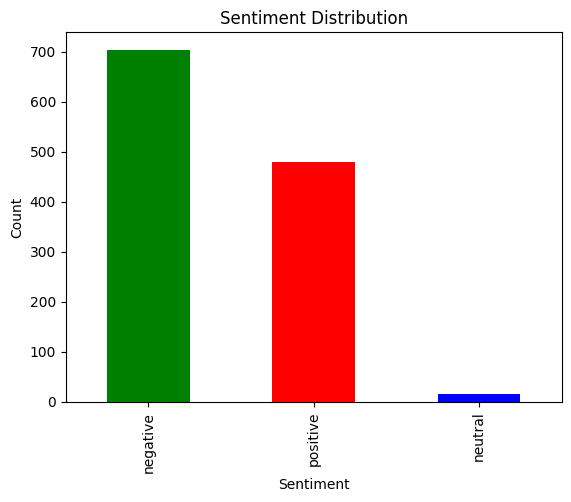

In [8]:
       # Sentiment distribution
df['sentiment_Analysis'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

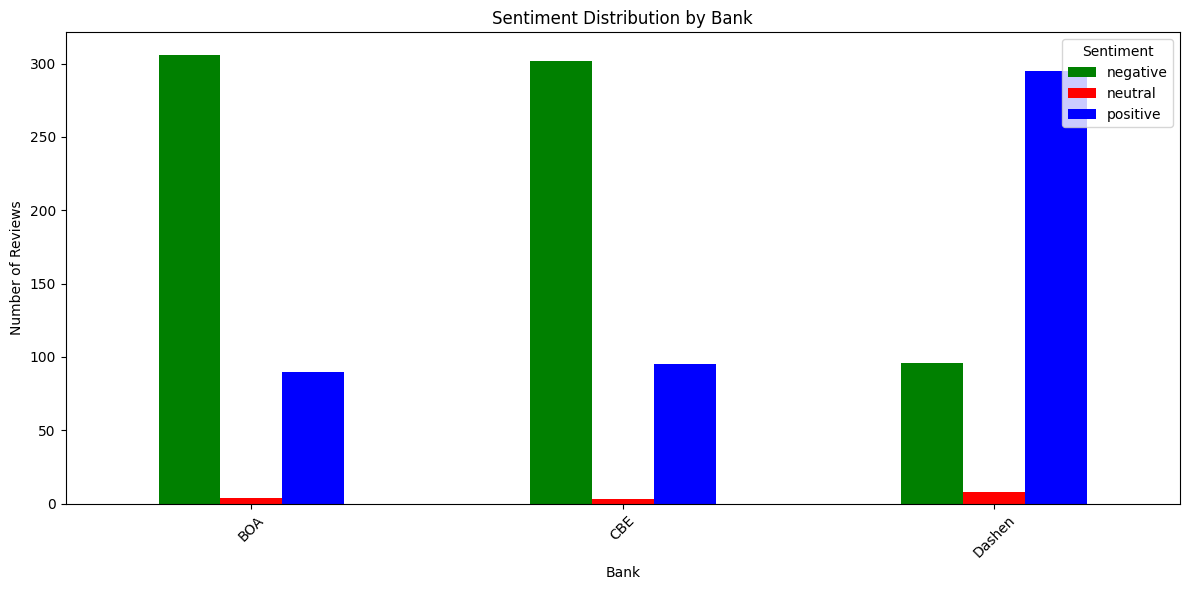

In [9]:
sentiment_by_bank.plot(kind='bar', figsize=(12, 6), color=['green', 'red', 'blue'])

plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [10]:
# Run theme clustering
clusters, theme_keywords = analyzer.cluster_themes(df['review'].tolist())

# View the results
print("Assigned Clusters:", clusters)
print("Theme Keywords per Cluster:")
for cluster_id, keywords in theme_keywords.items():
    print(f"Cluster {cluster_id}: {keywords}")

Assigned Clusters: [2 4 4 ... 2 3 3]
Theme Keywords per Cluster:
Cluster 0: ['dashen', 'and', 'super', 'easy', 'fast', 'dashen bank', 'super app', 'app', 'to use', 'use']
Cluster 1: ['good', 'best', 'app', 'best app', 'application', 'very', 'nice', 'it', 'excellent', 'the best']
Cluster 2: ['to', 'it', 'the', 'and', 'be', 'for', 'is', 'but', 'some', 'better']
Cluster 3: ['it', 'app', 'this', 'not', 'is', 'this app', 'working', 'the', 'banking', 'not working']
Cluster 4: ['the', 'to', 'it', 'is', 'app', 'and', 'the app', 'you', 'of', 'my']


In [11]:
df_result, theme_keywords = analyzer.analyze_reviews(df)

✅ Sentiment analysis results saved to: ../data/processed\sentiment_analysis_results.csv


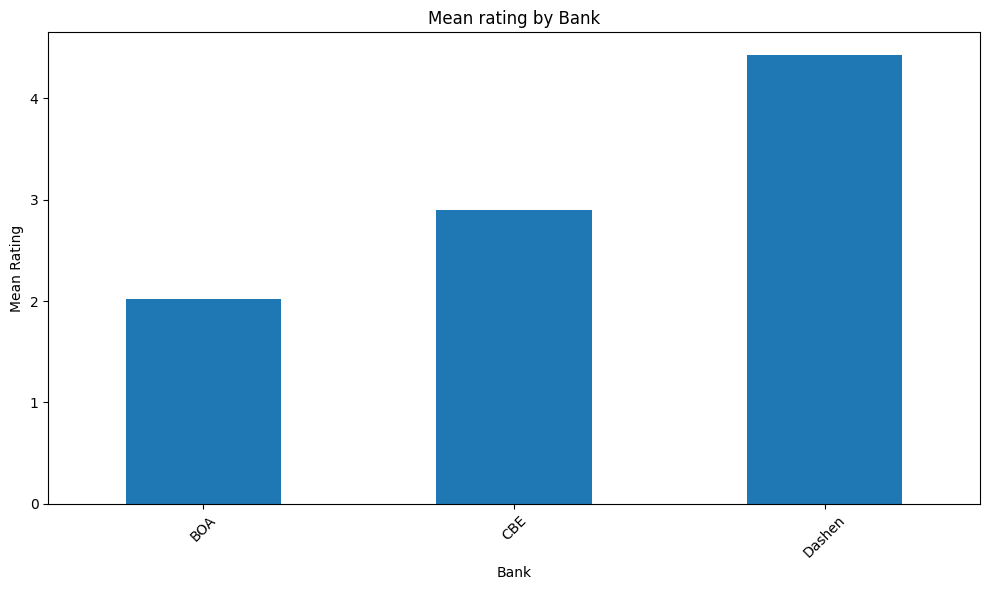

In [12]:
bank_sentiment= analyzer.plot_bank_sentiment(df)

In [14]:
# Calculate average rating per bank
average_rating = df.groupby('bank')['rating'].mean()

# Print the result
print(average_rating)

bank
BOA       2.022500
CBE       2.900000
Dashen    4.431078
Name: rating, dtype: float64


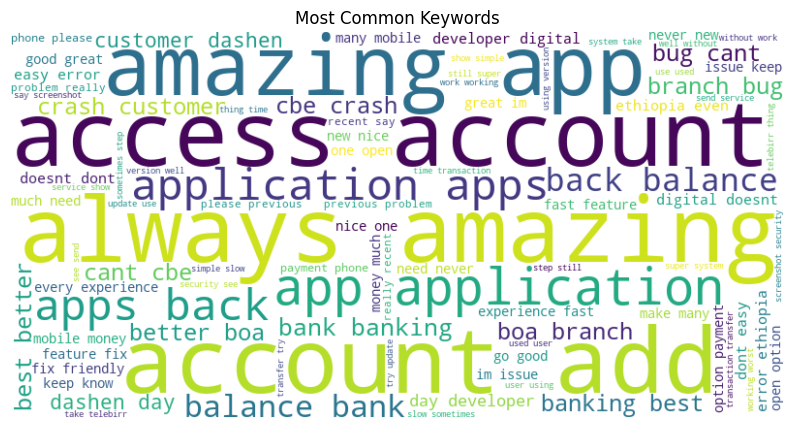

In [15]:
keywordCloud= analyzer.plot_keyword_cloud(df)

In [16]:
df_cleand = pd.read_csv('../data/processed/sentiment_analysis_results.csv')

In [17]:
# sentiment by theme
sentiment_by_theme = df_cleand.groupby(['bank', 'theme_category', 'sentiment_label']).size().unstack(fill_value=0)
print("\nSentiment Distribution by Theme:")
print(sentiment_by_theme)


Sentiment Distribution by Theme:
sentiment_label                     negative  neutral  positive
bank   theme_category                                          
BOA    Technical Performance              39        1         2
       User Interface & Experience       302        1        55
CBE    Technical Performance              49        0         4
       User Interface & Experience       245        6        96
Dashen Technical Performance               2        0        11
       User Interface & Experience        97        0       289


In [18]:
# Driver & Pain point extraction
positive_reviews = df_cleand[df_cleand['sentiment_label'] == 'positive']
negative_reviews = df_cleand[df_cleand['sentiment_label'] == 'negative']

# Most common positive themes (drivers)
drivers = positive_reviews['theme_category'].value_counts()
print("Most common positive themes (drivers):")
print(drivers)

Most common positive themes (drivers):
theme_category
User Interface & Experience    440
Technical Performance           17
Name: count, dtype: int64


In [19]:
# Most common negative themes (pain points)
pain_points = negative_reviews['theme_category'].value_counts().head(3)
print("\nMost common negative themes (pain points):")
print(pain_points)


Most common negative themes (pain points):
theme_category
User Interface & Experience    644
Technical Performance           90
Name: count, dtype: int64


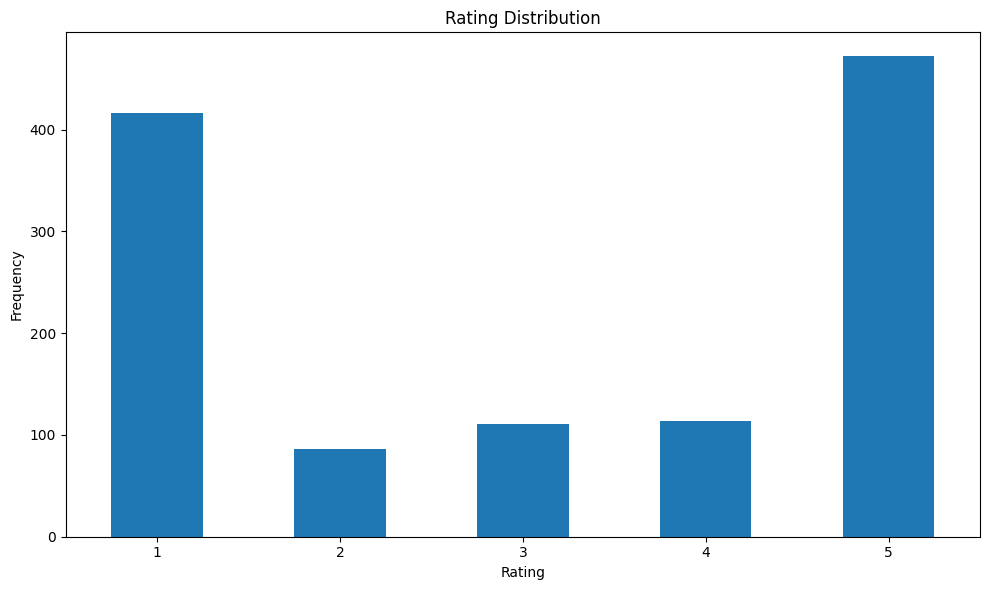

In [20]:
rating_distribution = analyzer.rating_distribution(df_cleand)